# Farewell Winter: hello Endless Summer

I created this notebook because I wanted an easy-to-use CSV file for an introductory programming course.

It notebook takes the maximum / minimum temperate data as issued by the Bureau of Meterology
and puts it into a format that's easier for beginning Python programs to work with in pandas.

All temperatures from the Sydney observatory:

- Minimum temperatures downloaded from http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=066062&p_c=-872831567&p_nccObsCode=123&p_startYear=2016

- Maximum temperatures downloaded from http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=066062&p_c=-872831371&p_nccObsCode=122&p_startYear=2016

Sydney "feels like" winter when the maximum temperature is below 20. It means you have the heater on
(or it means I need to light a fire). It feels like summer when the minimum temperature is above 20; 
you have to sleep with at least a fan and you can dive into the pool or sea any time of the data or
night and it isn't the uncomfortable.

So is Sydney becoming the city of endless Summer? Who wants to take a bet on the first year when there 
are more summer-like days than winter-like days? I'm guessing around 2020.

In [1]:
%matplotlib inline
import pandas

# If you are using this in 2018 or later, change this variable
last_full_year = 2016

In [2]:
minimums = pandas.read_csv('data/weather/IDCJAC0011_066062_1800_Data.csv', parse_dates=[['Year','Month','Day']])
minimums.columns = ['Date','Code','Station','Min','Accum','Quality']
just_minimums = minimums[['Date','Min']]

maximums = pandas.read_csv('data/weather/IDCJAC0010_066062_1800_Data.csv', parse_dates=[['Year','Month','Day']])
maximums.columns = ['Date','Code','Station','Max','Accum','Quality']
just_maximums = maximums[['Date','Max']]

temperatures = just_minimums[['Date', 'Min']].merge(
               just_maximums[['Date', 'Max']],
    left_on='Date',
    right_on="Date"
)
temperatures['Year'] = temperatures.Date.dt.year

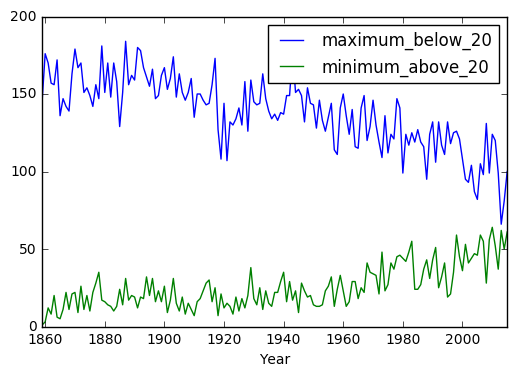

In [3]:
extremes = pandas.DataFrame({
        'minimum_above_20': temperatures[(temperatures.Min > 20) & (temperatures.Year < last_full_year)].groupby('Year').Min.count(),
        'maximum_below_20': temperatures[(temperatures.Max < 20) & (temperatures.Year < last_full_year)].groupby('Year').Max.count()
    })
extremes.to_csv('sydney-yearly-data.csv')
extremes.plot()

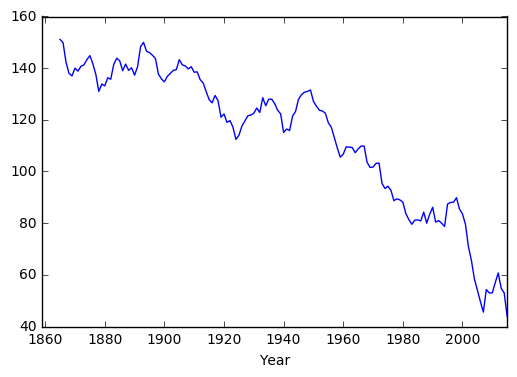

In [17]:
extremes['summer_vs_winter'] = extremes.maximum_below_20 - extremes.minimum_above_20
extremes.summer_vs_winter.rolling(7).mean().plot()